In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/PSL/Project/Project 3

/content/drive/MyDrive/PSL/Project/Project 3


In [ ]:
!pip install requirements.txt

In [ ]:
from utils import *

# Basic Model Vs Attacks

In [ ]:
!python model.py --force-train --model-file models/basic_model.pth -e 50

Training model
models/basic_model.pth
Files already downloaded and verified
Starting training
epoch : 0 --- loss : 2.286237447110755 
epoch : 1 --- loss : 1.989543350361127 
epoch : 2 --- loss : 1.7303433816157316 
epoch : 3 --- loss : 1.5751323432878759 
epoch : 4 --- loss : 1.4901460926568562 
epoch : 5 --- loss : 1.431640995592171 
epoch : 6 --- loss : 1.380923393697695 
epoch : 7 --- loss : 1.3327337037029803 
epoch : 8 --- loss : 1.3010462316557287 
epoch : 9 --- loss : 1.2581605239680669 
epoch : 10 --- loss : 1.2253393161771813 
epoch : 11 --- loss : 1.1880565604145117 
epoch : 12 --- loss : 1.1581711133347081 
epoch : 13 --- loss : 1.1266131894717724 
epoch : 14 --- loss : 1.1006383926240857 
epoch : 15 --- loss : 1.077617197002483 
epoch : 16 --- loss : 1.0521324282374591 
epoch : 17 --- loss : 1.0290545477811064 
epoch : 18 --- loss : 1.0056769331828352 
epoch : 19 --- loss : 0.9874446079436663 
epoch : 20 --- loss : 0.9701764509422494 
epoch : 21 --- loss : 0.950917907531241

Plotting Training loss


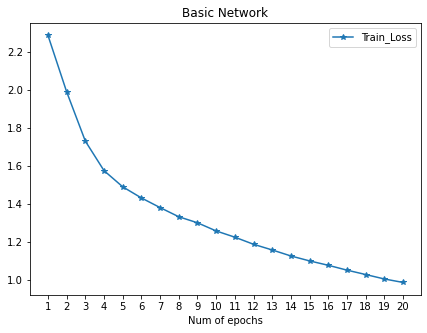

In [ ]:

print("Plotting Training loss")
loss_netwA = [2.286237447110755, 1.989543350361127, 1.7303433816157316, 1.5751323432878759, 1.4901460926568562,
             1.431640995592171, 1.380923393697695, 1.3327337037029803, 1.3010462316557287, 1.2581605239680669, 
             1.2253393161771813, 1.1880565604145117, 1.1581711133347081, 1.1266131894717724, 1.1006383926240857,
             1.077617197002483, 1.0521324282374591, 1.0290545477811064, 1.0056769331828352, 0.9874446079436663]


fig = plt.figure(figsize=(7,5))
plt.plot(np.arange(1,21), loss_netwA, "*-",label="Train_Loss")
plt.title("Basic Network")
plt.xlabel("Num of epochs")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.show()
#plot_loss(loss_netwA, 20)

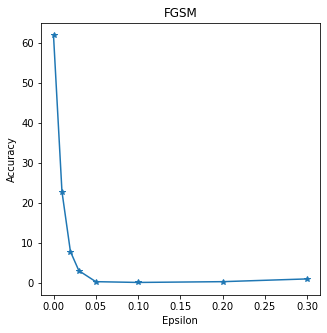

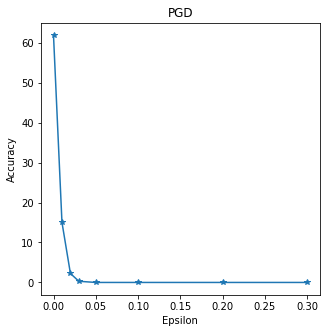

In [ ]:
epsilon_arr = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2 , 0.3]
fgsm_acc = [61.81640625, 22.8515625, 7.91015625, 3.125, 0.390625, 0.1953125, 0.390625, 1.07421875]
pgd_acc = [61.81640625, 15.0390625, 2.24609375, 0.29296875, 0.0, 0.0, 0.0, 0.0]

acc_vs_eps("FGSM", epsilon_arr, fgsm_acc)
acc_vs_eps("PGD", epsilon_arr, pgd_acc)

# Distillation defense

In [ ]:
!python distil_defense.py --force-train --model-file models/distilled_model.pth -e 20

Training model netA
models/distilled_model.pth
Files already downloaded and verified
Starting training
epoch : 0 --- loss : 2.3025588151444647 
epoch : 1 --- loss : 2.2463942633821326 
epoch : 2 --- loss : 1.8554475190669084 
epoch : 3 --- loss : 1.563618146540058 
epoch : 4 --- loss : 1.4308394699373874 
epoch : 5 --- loss : 1.318993089870251 
epoch : 6 --- loss : 1.238683867501247 
epoch : 7 --- loss : 1.1723954695101115 
epoch : 8 --- loss : 1.1167477872307825 
epoch : 9 --- loss : 1.0679192342920134 
epoch : 10 --- loss : 1.028180391277697 
epoch : 11 --- loss : 0.9863147493634327 
epoch : 12 --- loss : 0.955994176249501 
epoch : 13 --- loss : 0.9269887687216235 
epoch : 14 --- loss : 0.8924466784797721 
epoch : 15 --- loss : 0.8697587756025176 
epoch : 16 --- loss : 0.8471182969019819 
epoch : 17 --- loss : 0.8214715462272888 
epoch : 18 --- loss : 0.8044057180295966 
epoch : 19 --- loss : 0.7924107911538486 
Model saved in models/distilled_model.pth
Training loss netA =  [2.30255

Plotting Loss for netA and netF


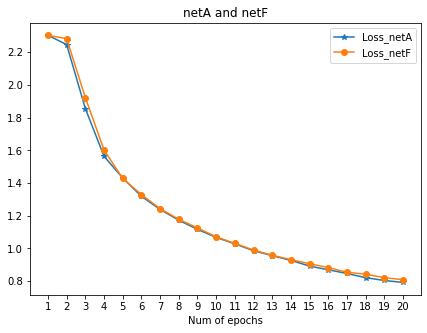

In [ ]:
print("Plotting Loss for netA and netF")
loss_netwA = [2.3025588151444647, 2.2463942633821326, 1.8554475190669084, 1.563618146540058, 1.4308394699373874, 1.318993089870251, 1.238683867501247, 1.1723954695101115, 1.1167477872307825, 1.0679192342920134, 1.028180391277697, 0.9863147493634327, 0.955994176249501, 0.9269887687216235, 0.8924466784797721, 0.8697587756025176, 0.8471182969019819, 0.8214715462272888, 0.8044057180295966, 0.7924107911538486]
loss_netwF = [2.3025689705924064, 2.2828615753577473, 1.9224805859940104, 1.6018703278180901, 1.428208830425118, 1.3292203615647682, 1.2431684218536865, 1.1785328620637188, 1.125518283837765, 1.0714104938631661, 1.0309645158064125, 0.9904303734673152, 0.9585804698865916, 0.9316037186682419, 0.9067663184612269, 0.8833172769035723, 0.8545658501299435, 0.8427149603991319, 0.8215760163899577, 0.8092311195381945]

fig = plt.figure(figsize=(7,5))
plt.plot(np.arange(1,21), loss_netwA, "*-",label="Loss_netA")
plt.plot(np.arange(1,21), loss_netwF, "o-",label="Loss_netF")
plt.title("netA and netF")
plt.xlabel("Num of epochs")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.show()

#plot_loss(loss_netwA, loss_netwF, 20)

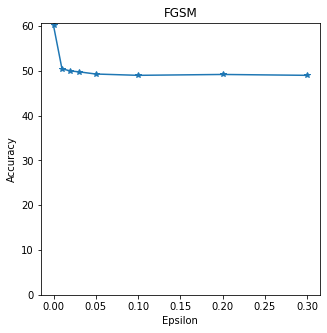

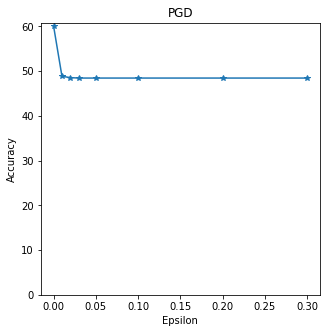

In [ ]:
epsilon_arr = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2 , 0.3]
fgsm_acc =  [60.15625, 50.48828125, 50.0, 49.8046875, 49.31640625, 49.0234375, 49.21875, 49.0234375]
pgd_acc =  [60.15625, 48.828125, 48.53515625, 48.4375, 48.4375, 48.4375, 48.4375, 48.4375]

def acc_vs_eps(attack_name, epsilons, accuracies):
  fig = plt.figure(figsize=(5,5))
  plt.plot(epsilons, accuracies, "*-")
  plt.title(attack_name)
  plt.ylim(bottom=0)
  plt.xlabel("Epsilon")
  plt.ylabel("Accuracy")
  plt.show()

acc_vs_eps("FGSM", epsilon_arr, fgsm_acc)
acc_vs_eps("PGD", epsilon_arr, pgd_acc)

# Randomized defense
We inject gaussian noise at inference time to make the default model more robust

In [ ]:
!python randomized.py

Files already downloaded and verified
Starting training
epoch : 0 --- loss : 2.299202667506671 
epoch : 1 --- loss : 2.0835495319030084 
epoch : 2 --- loss : 1.8650339989005 
epoch : 3 --- loss : 1.678530581942732 
epoch : 4 --- loss : 1.5684181841894507 
epoch : 5 --- loss : 1.4998840480205828 
epoch : 6 --- loss : 1.4386902514584776 
epoch : 7 --- loss : 1.3944322189655591 
epoch : 8 --- loss : 1.353966406285568 
epoch : 9 --- loss : 1.3117868641791663 
epoch : 10 --- loss : 1.2701936644872445 
epoch : 11 --- loss : 1.2380315988068484 
epoch : 12 --- loss : 1.198221704992572 
epoch : 13 --- loss : 1.1667614721691273 
epoch : 14 --- loss : 1.1381548511911888 
epoch : 15 --- loss : 1.1098312871040354 
epoch : 16 --- loss : 1.085910937857737 
epoch : 17 --- loss : 1.059418990127718 
epoch : 18 --- loss : 1.0381788278934148 
epoch : 19 --- loss : 1.0159165491511197 
epoch : 20 --- loss : 0.9971686292130678 
epoch : 21 --- loss : 0.9753053154063956 
epoch : 22 --- loss : 0.957832799442136

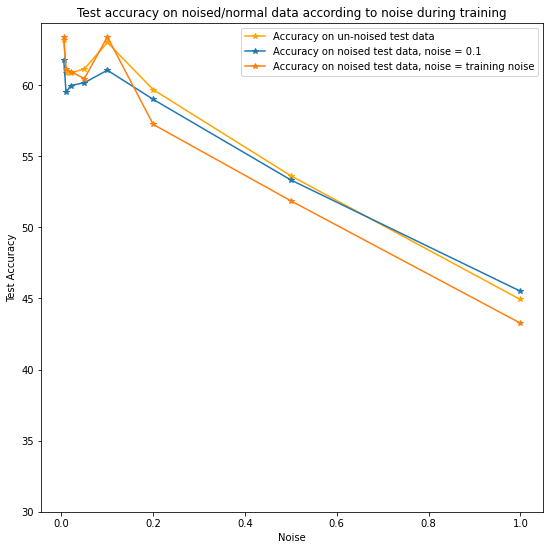

In [ ]:
import matplotlib.pyplot as plt
noises = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
# Exactly the same for 0.01 and 0.02 ?
natural_acc = [63.18359375, 60.83984375, 60.83984375, 61.1328125, 62.98828125, 59.66796875, 53.61328125, 44.921875]

# Validation accuracy on test data with a noise of 0.1 : 
noised_acc_01 = [61.71875, 59.47265625, 59.9609375, 60.15625, 61.03515625, 58.984375, 53.3203125, 45.5078125]

# Validation accuracy on test data with the same noise as training : 
noised_acc = [63.37890625, 61.1328125, 60.9375, 60.44921875, 63.37890625, 57.2265625, 51.85546875, 43.26171875]

fig = plt.figure(figsize=(9,9))
plt.plot(noises, natural_acc, "*-", color="orange", label="Accuracy on un-noised test data")
plt.plot(noises, noised_acc_01, "*-", label="Accuracy on noised test data, noise = 0.1")
plt.plot(noises, noised_acc, "*-", label="Accuracy on noised test data, noise = training noise")
plt.title("Test accuracy on noised/normal data according to noise during training")
plt.ylim(bottom=30)
plt.xlabel("Noise")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

In [ ]:
!python randomized.py

Files already downloaded and verified
Files already downloaded and verified
Testing model : models/random/randomized_0.005.pth
Epsilon: 0.01	Test Accuracy = 24.8046875
Epsilon: 0.01	Test Accuracy = 24.609375
Epsilon: 0.02	Test Accuracy = 8.984375
Epsilon: 0.02	Test Accuracy = 8.88671875
Epsilon: 0.03	Test Accuracy = 4.00390625
Epsilon: 0.03	Test Accuracy = 3.90625
Epsilon: 0.05	Test Accuracy = 0.78125
Epsilon: 0.05	Test Accuracy = 0.78125
Epsilon: 0.1	Test Accuracy = 0.0
Epsilon: 0.1	Test Accuracy = 0.09765625
Epsilon: 0.2	Test Accuracy = 0.390625
Epsilon: 0.2	Test Accuracy = 0.1953125
Epsilon: 0.3	Test Accuracy = 0.390625
Epsilon: 0.3	Test Accuracy = 0.390625
Epsilon: 0.5	Test Accuracy = 1.26953125
Epsilon: 0.5	Test Accuracy = 1.171875
Epsilons : [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5]. Noise : 0.005
Accuracy /eps on noised testing data : [24.8046875, 8.984375, 4.00390625, 0.78125, 0.0, 0.390625, 0.390625, 1.26953125]
Accuracy /eps on un noised testing data : [24.609375, 8.886718

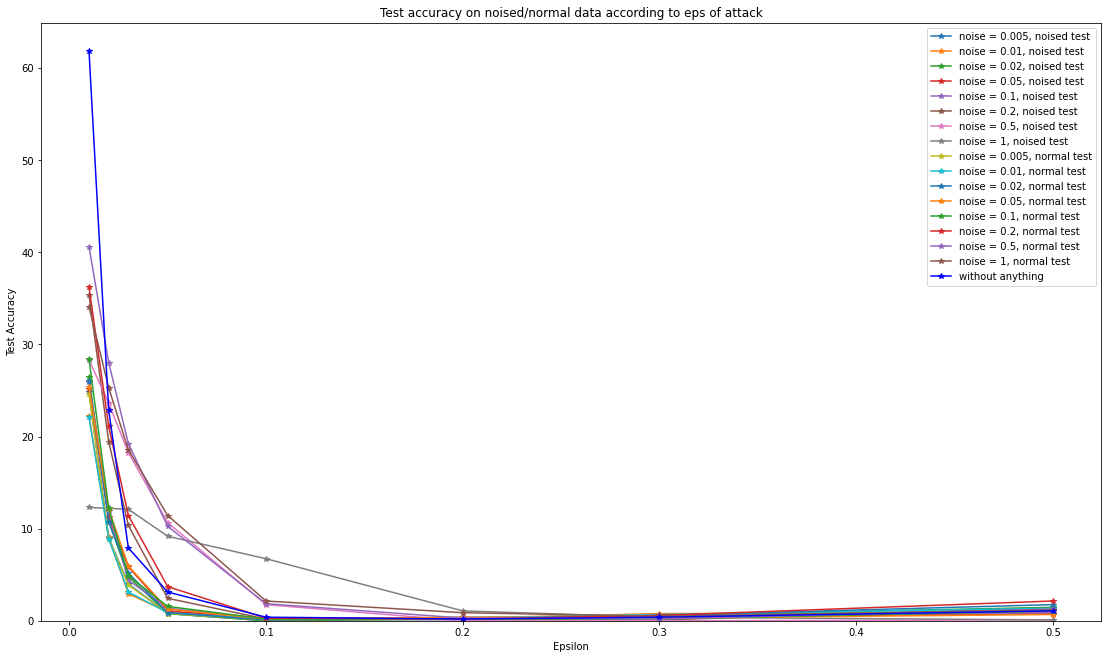

In [ ]:
import matplotlib.pyplot as plt
epsilons = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5]

acc_0005 = [24.609375, 8.88671875, 3.90625, 0.78125, 0.09765625, 0.1953125, 0.390625, 1.171875]
acc_noised_0005 = [24.8046875, 8.984375, 4.00390625, 0.78125, 0.0, 0.390625, 0.390625, 1.26953125]

acc_001 = [22.0703125, 8.88671875, 3.125, 0.87890625, 0.1953125, 0.29296875, 0.68359375, 1.3671875]
acc_noised_001 = [22.265625, 9.08203125, 2.9296875, 0.9765625, 0.29296875, 0.29296875, 0.78125, 0.87890625]

acc_002 = [26.07421875, 10.7421875, 5.17578125, 0.87890625, 0.09765625, 0.1953125, 0.5859375, 1.7578125]
acc_noised_002 = [26.46484375, 10.83984375, 4.78515625, 0.78125, 0.0, 0.1953125, 0.5859375, 1.46484375]

acc_noised_005 = [25.1953125, 11.23046875, 5.859375, 1.07421875, 0.1953125, 0.1953125, 0.390625, 0.78125]
acc_005 = [25.390625, 12.109375, 5.95703125, 1.26953125, 0.1953125, 0.390625, 0.29296875, 0.68359375]

acc_noised_01 = [25.87890625, 11.9140625, 4.39453125, 1.3671875, 0.1953125, 0.09765625, 0.48828125, 0.87890625]
acc_01 = [28.41796875, 12.20703125, 4.8828125, 1.5625, 0.1953125, 0.1953125, 0.1953125, 1.07421875]

acc_noised_02 = [35.3515625, 19.43359375, 10.3515625, 2.44140625, 0.1953125, 0.1953125, 0.09765625, 1.3671875]
acc_02 = [36.23046875, 21.09375, 11.42578125, 3.7109375, 0.29296875, 0.1953125, 0.5859375, 2.1484375]

acc_noised_05 = [28.3203125, 23.6328125, 18.26171875, 10.64453125, 1.7578125, 0.0, 0.0, 0.09765625]
acc_05 = [40.625, 28.02734375, 19.23828125, 10.25390625, 1.85546875, 0.29296875, 0.1953125, 1.26953125]

acc_noised_1 = [12.3046875, 12.20703125, 12.109375, 9.1796875, 6.73828125, 1.07421875, 0.390625, 0.09765625]
acc_1 = [34.08203125, 25.29296875, 18.5546875, 11.42578125, 2.1484375, 0.87890625, 0.48828125, 1.171875]

fgsm_acc = [61.81640625, 22.8515625, 7.91015625, 3.125, 0.390625, 0.1953125, 0.390625, 1.07421875] # without anything

fig = plt.figure(figsize=(19,11))

# BETTER THAN WITHOUT ANYTHING IS 0.5 ONLY
plt.plot(epsilons, acc_noised_0005, "*-", label="noise = 0.005, noised test")
plt.plot(epsilons, acc_noised_001, "*-", label="noise = 0.01, noised test")
plt.plot(epsilons, acc_noised_002, "*-", label="noise = 0.02, noised test")
plt.plot(epsilons, acc_noised_005, "*-", label="noise = 0.05, noised test")
plt.plot(epsilons, acc_noised_01, "*-", label="noise = 0.1, noised test")
plt.plot(epsilons, acc_noised_02, "*-", label="noise = 0.2, noised test")
plt.plot(epsilons, acc_noised_05, "*-", label="noise = 0.5, noised test")
plt.plot(epsilons, acc_noised_1, "*-", label="noise = 1, noised test")


# BETTER THAN WITHOUT ANYTHING ARE : 1, 0.2, 0.5
plt.plot(epsilons, acc_0005, "*-", label="noise = 0.005, normal test")
plt.plot(epsilons, acc_001, "*-", label="noise = 0.01, normal test")
plt.plot(epsilons, acc_002, "*-", label="noise = 0.02, normal test")
plt.plot(epsilons, acc_005, "*-", label="noise = 0.05, normal test")
plt.plot(epsilons, acc_01, "*-", label="noise = 0.1, normal test")
plt.plot(epsilons, acc_02, "*-", label="noise = 0.2, normal test")
plt.plot(epsilons, acc_05, "*-", label="noise = 0.5, normal test")
plt.plot(epsilons, acc_1, "*-", label="noise = 1, normal test")

plt.plot(epsilons, fgsm_acc, "*-", color = "blue", label="without anything")
plt.title("Test accuracy on noised/normal data according to eps of attack")
plt.ylim(bottom=0)
plt.xlabel("Epsilon")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

# Based on that, a good epsilon to test things on is 0.03 (difference well seen)
# A good noise to test on is 0.5, but also 0.2 and 1 if we don't use noised data on testing.
# Let's see if changing the noise between testing and training improves results for a particular epsilon and those 3 trained networks

In [ ]:
!python randomized.py

Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 19.140625
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 19.43359375
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 19.04296875
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 19.62890625
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 19.140625
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 19.7265625
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 19.04296875
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 6.0546875
Testing model : models/random/randomized_0.5.pth

 Noises : [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1] 
 Epsilon : 0.03
Accuracy/test noise : [19.140625, 19.43359375, 19.04296875, 19.62890625, 19.140625, 19.7265625, 19.04296875, 6.0546875]
Files already downloaded and verified
Epsilon: 0.03	Test Accuracy = 11.328125
Files already downloaded and verified
Epsilon: 0

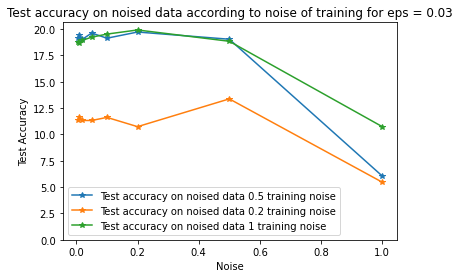

In [ ]:
noises = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1] 

acc_noised_05 = [19.140625, 19.43359375, 19.04296875, 19.62890625, 19.140625, 19.7265625, 19.04296875, 6.0546875]
acc_noised_02 = [11.328125, 11.62109375, 11.328125, 11.328125, 11.62109375, 10.7421875, 13.37890625, 5.46875]
acc_noised_1 = [18.75, 18.65234375, 18.9453125, 19.23828125, 19.53125, 19.921875, 18.84765625, 10.7421875]

plt.plot(noises, acc_noised_05, "*-", label="Test accuracy on noised data 0.5 training noise")
plt.plot(noises, acc_noised_02, "*-", label="Test accuracy on noised data 0.2 training noise")
plt.plot(noises, acc_noised_1, "*-", label="Test accuracy on noised data 1 training noise")

plt.title("Test accuracy on noised data according to noise of training for eps = 0.03")
plt.ylim(bottom=0)
plt.xlabel("Noise")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

# BEST IS MODEL TRAINED ON NOISE 1 WITH TESTING NOISE 0.2

In [ ]:
from randomized import *
model_name = "models/random/randomized_0.5.pth"
noise = 0.2
test_multiple_fgsm(model_name, noise)

Files already downloaded and verified
Files already downloaded and verified
Testing model : models/random/randomized_0.5.pth
Epsilon: 0.01	Test Accuracy = 40.13671875
Epsilon: 0.01	Test Accuracy = 40.625
Epsilon: 0.02	Test Accuracy = 28.7109375
Epsilon: 0.02	Test Accuracy = 28.02734375
Epsilon: 0.03	Test Accuracy = 19.140625
Epsilon: 0.03	Test Accuracy = 19.23828125
Epsilon: 0.05	Test Accuracy = 9.86328125
Epsilon: 0.05	Test Accuracy = 10.25390625
Epsilon: 0.1	Test Accuracy = 1.85546875
Epsilon: 0.1	Test Accuracy = 1.85546875
Epsilon: 0.2	Test Accuracy = 0.0
Epsilon: 0.2	Test Accuracy = 0.29296875
Epsilon: 0.3	Test Accuracy = 0.29296875
Epsilon: 0.3	Test Accuracy = 0.1953125
Epsilon: 0.5	Test Accuracy = 0.78125
Epsilon: 0.5	Test Accuracy = 1.26953125
Epsilons : [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5]. Noise : 0.2
Accuracy /eps on noised testing data : [40.13671875, 28.7109375, 19.140625, 9.86328125, 1.85546875, 0.0, 0.29296875, 0.78125]
Accuracy /eps on un noised testing data : [4

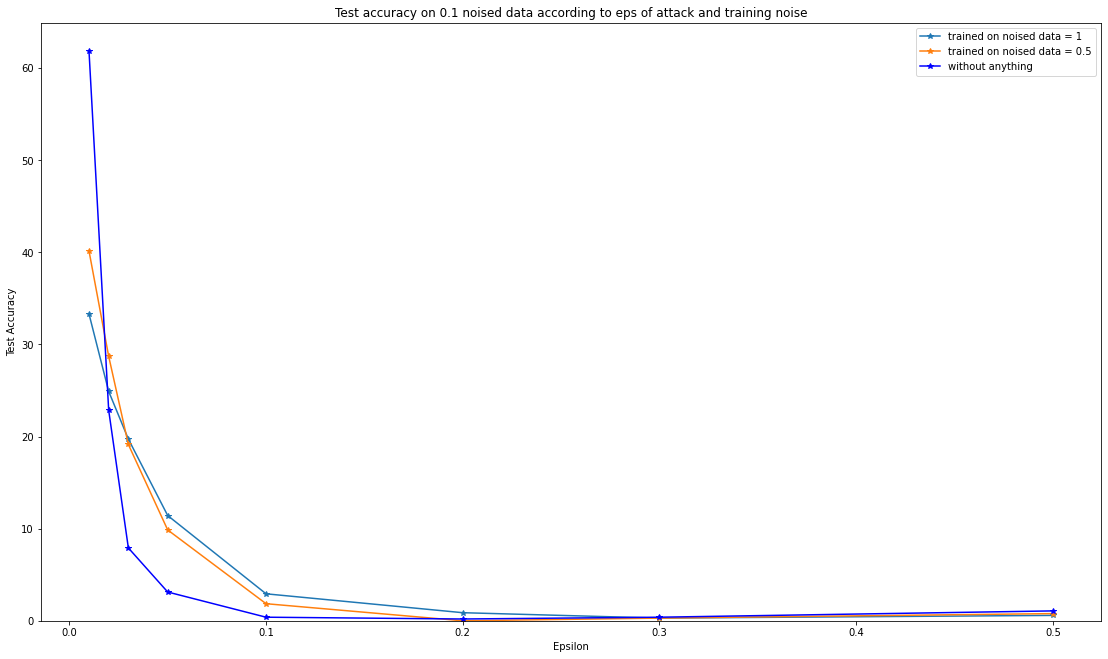

In [ ]:
fgsm_noised_acc_1 = [33.30078125, 24.90234375, 19.7265625, 11.42578125, 2.9296875, 0.87890625, 0.29296875, 0.5859375]
fgsm_noised_acc_05 = [40.13671875, 28.7109375, 19.140625, 9.86328125, 1.85546875, 0.0, 0.29296875, 0.78125]
fgsm_acc = [61.81640625, 22.8515625, 7.91015625, 3.125, 0.390625, 0.1953125, 0.390625, 1.07421875] # without anything
fig = plt.figure(figsize=(19,11))

plt.plot(epsilons, fgsm_noised_acc_1, "*-", label = "trained on noised data = 1")
plt.plot(epsilons, fgsm_noised_acc_05, "*-", label = "trained on noised data = 0.5")
plt.plot(epsilons, fgsm_acc, "*-", color = "blue", label="without anything")
plt.title("Test accuracy on 0.1 noised data according to eps of attack and training noise")
plt.ylim(bottom=0)
plt.xlabel("Epsilon")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

In [ ]:
train_network(noise=2)

Files already downloaded and verified
Starting training
epoch : 0 --- loss : 2.2719240945433574 
epoch : 1 --- loss : 2.1171472440896513 
epoch : 2 --- loss : 2.073263619477106 
epoch : 3 --- loss : 2.0482133085006673 
epoch : 4 --- loss : 2.030529198967344 
epoch : 5 --- loss : 2.013803894421698 
epoch : 6 --- loss : 1.9966064211124692 
epoch : 7 --- loss : 1.9869587524975927 
epoch : 8 --- loss : 1.9747406287881613 
epoch : 9 --- loss : 1.9674553215542625 
epoch : 10 --- loss : 1.9625579764997156 
epoch : 11 --- loss : 1.9542447815215487 
epoch : 12 --- loss : 1.943532982735288 
epoch : 13 --- loss : 1.9387079534150664 
epoch : 14 --- loss : 1.9318294010467578 
epoch : 15 --- loss : 1.9313064695261102 
epoch : 16 --- loss : 1.9258599785867663 
epoch : 17 --- loss : 1.9258709048851108 
epoch : 18 --- loss : 1.9215888850911624 
epoch : 19 --- loss : 1.9175096326680996 
epoch : 20 --- loss : 1.9126223542190393 


# Ensemble training

In [ ]:
!python ensemble_model.py

Training 10 models
Files already downloaded and verified
Starting training
epoch : 0 --- loss : 2.282195128777851 
epoch : 1 --- loss : 1.9886510160372664 
epoch : 2 --- loss : 1.7834340047400268 
epoch : 3 --- loss : 1.605963944376566 
epoch : 4 --- loss : 1.5143212888226798 
epoch : 5 --- loss : 1.4525024231394315 
epoch : 6 --- loss : 1.4041133707134963 
epoch : 7 --- loss : 1.3632512488916448 
epoch : 8 --- loss : 1.3190161004555452 
epoch : 9 --- loss : 1.2814089869611953 
epoch : 10 --- loss : 1.2484952487017422 
epoch : 11 --- loss : 1.2075285345491127 
epoch : 12 --- loss : 1.1766830073471244 
epoch : 13 --- loss : 1.1448060528738369 
epoch : 14 --- loss : 1.1183528304878674 
epoch : 15 --- loss : 1.0926982620274763 
epoch : 16 --- loss : 1.068796674773866 
epoch : 17 --- loss : 1.0482302281998248 
epoch : 18 --- loss : 1.0269977978675837 
epoch : 19 --- loss : 1.0075009385212663 
Model saved in models/ensemble_models/model_0.pth
Training loss =  [2.282195128777851, 1.988651016

In [ ]:
import matplotlib.pyplot as plt

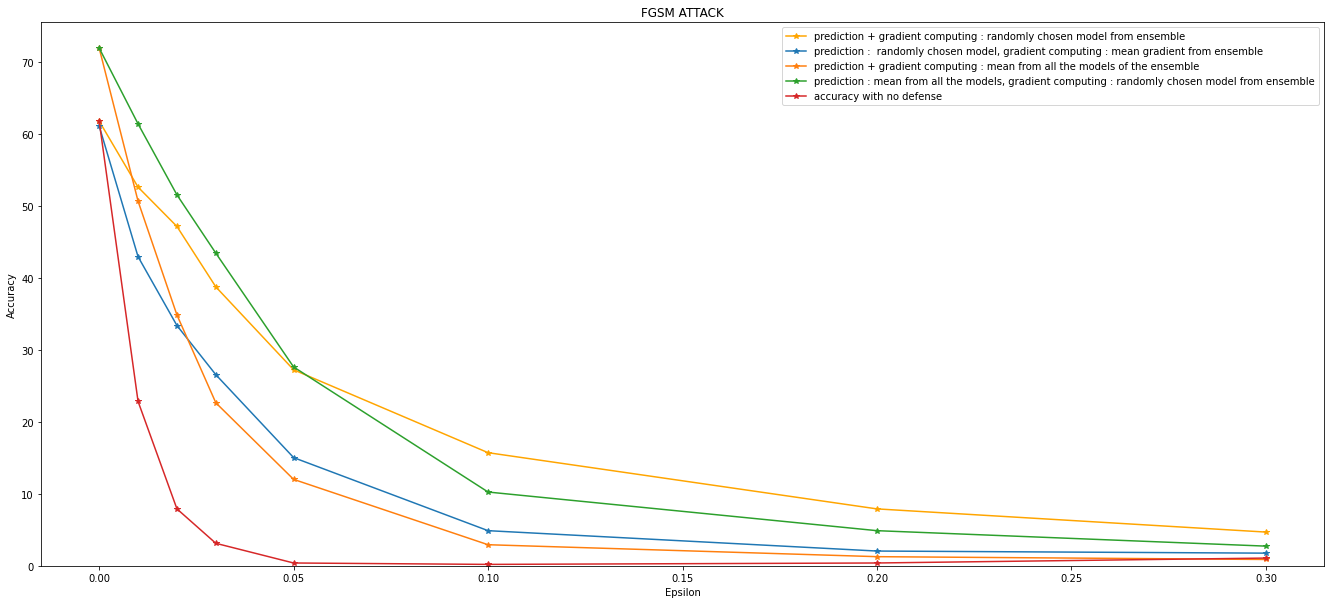

In [ ]:
epsilons = [0., 0.01, 0.02, 0.03, 0.05, 0.1, 0.2 , 0.3]

fgsm_acc = [61.81640625, 22.8515625, 7.91015625, 3.125, 0.390625, 0.1953125, 0.390625, 1.07421875] # without anything

fgsm_acc_3bis = [61.1328125, 42.96875, 33.3984375, 26.5625, 15.0390625, 4.8828125, 2.05078125, 1.7578125]
fgsm_ensemble_rand = [61.81640625, 52.63671875, 47.16796875, 38.76953125, 27.24609375, 15.72265625, 7.91015625, 4.6875]
fgsm_acc_2 = [71.97265625, 50.68359375, 34.86328125, 22.65625, 12.01171875, 2.9296875, 1.26953125, 0.87890625] # with prediction2
fgsm_acc_2bis = [71.97265625, 61.42578125, 51.5625, 43.45703125, 27.63671875, 10.25390625, 4.8828125, 2.734375]

fig = plt.figure(figsize=(23,10))
plt.plot(epsilons, fgsm_ensemble_rand, "*-", color="orange", label="prediction + gradient computing : randomly chosen model from ensemble")
plt.plot(epsilons, fgsm_acc_3bis, "*-", label = "prediction :  randomly chosen model, gradient computing : mean gradient from ensemble")
plt.plot(epsilons, fgsm_acc_2, "*-", label="prediction + gradient computing : mean from all the models of the ensemble")
plt.plot(epsilons, fgsm_acc_2bis, "*-", label = "prediction : mean from all the models, gradient computing : randomly chosen model from ensemble")
plt.plot(epsilons, fgsm_acc, "*-", label="accuracy with no defense")
plt.title("FGSM ATTACK")
plt.ylim(bottom=0)
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
